In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('/content/sample_data/500_drugsComTrain_raw_copy1.csv')
df_test = pd.read_csv('/content/sample_data/500_drugsComTest_raw.csv')

In [ ]:
df_train.shape

(372, 7)

In [ ]:
df_test.shape

(378, 7)

In [ ]:
df_test.shape

(378, 7)

In [ ]:
df_train.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [ ]:
#merging test and train data
merge =  [df_train,df_test]
df_data = pd.concat(merge)

In [ ]:
df_data.shape

(750, 7)

In [ ]:
df_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 377
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     750 non-null    int64 
 1   drugName     750 non-null    object
 2   condition    745 non-null    object
 3   review       750 non-null    object
 4   rating       750 non-null    int64 
 5   date         750 non-null    object
 6   usefulCount  750 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 46.9+ KB


In [ ]:
df_data.describe()

,uniqueID,rating,usefulCount
count,750.00000,750.000000,750.000000
mean,120696.45200,6.841333,27.001333
std,68347.44863,3.340514,39.054188
min,632.00000,1.000000,0.000000
25%,60076.50000,4.000000,6.000000
50%,121152.00000,8.000000,15.000000
75%,182255.25000,10.000000,32.000000
max,232066.00000,10.000000,470.000000


In [ ]:
#null values
df_data.isnull().sum(axis=0)

uniqueID       0
drugName       0
condition      5
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [ ]:
df_data['rating'].value_counts()

10    230
9     124
1     106
8      88
3      38
2      36
7      36
5      33
6      33
4      26
Name: rating, dtype: int64

In [ ]:
#calculating the null percentage
size = df_data.shape[0]

print ("Total Size of the dataset : ", size)

total_na = df_data.isnull().sum(axis = 0)['condition']
print ("Null values : ", total_na)

print ("PERCENTAGE : ", (total_na/size)*100)

Total Size of the dataset :  750
Null values :  5
PERCENTAGE :  0.6666666666666667


In [ ]:
# Dropping the null values as they are very much less than 5% of the whole dataset
df_data =df_data.dropna(how = 'any',axis=0)
df_data.shape

(745, 7)

In [ ]:
df_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
len(df_data['drugName'].unique())

397

In [ ]:
len(df_data['condition'].unique())

175

In [ ]:
len(df_data['rating'].unique())

10

In [ ]:
#sorting the column
df_data.sort_values(['uniqueID'], ascending = True, inplace = True)
df_data.reset_index(drop = True, inplace = True)
df_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,632,Medroxyprogesterone,Endometriosis,"""Depo has been great for relief of pain from e...",9,27-Aug-09,51
1,716,Medroxyprogesterone,Birth Control,"""I can&#039;t rate this a 10 because it is DEF...",8,1-May-11,1
2,1103,Metronidazole,Rosacea,"""Many people don&#039;t seem to like Metrogel,...",9,29-Feb-12,110
3,2198,Metformin,Polycystic Ovary Syndrome,"""I was diagnosed with PCOS in 2013 but did not...",10,24-Jun-15,24
4,3144,Nitrofurantoin,Urinary Tract Infection,"""Although I think I might have kidney stones i...",10,23-Jan-17,6
5,3350,Nitrofurantoin,Bladder Infection,"""One more day! I hope the infection don&#039;t...",9,6-Jan-16,7
6,4554,Belviq,Weight Loss,"""I&#039;ve been taking it for about 6 weeks. I...",7,30-Mar-16,25
7,4907,Belviq,Weight Loss,"""This is a waste of money. Did not curb my ap...",1,23-Sep-14,57
8,5357,Cryselle,Endometriosis,"""I started taking Cryselle almost 9 months ago...",7,2-Feb-14,14
9,5477,Sovaldi,Hepatitis C,"""My father has started the treatment 2 months ...",1,10-Aug-16,4


In [ ]:
# Total unique conditions in the dataset
print (df_data['condition'].nunique(), "\n")

print (df_data['condition'].unique()[0:10])

175 

['Endometriosis' 'Birth Control' 'Rosacea' 'Polycystic Ovary Syndrome'
 'Urinary Tract Infection' 'Bladder Infection' 'Weight Loss' 'Hepatitis C'
 'Anaplastic Oligodendroglioma' 'Overactive Bladde']


In [ ]:
# Minimum rating in the dataset
df_data['rating'].min()

1

In [ ]:
# top 10 drugs with rating equals 1
df_data.loc[df_data['rating'] == 1, :]['drugName'].value_counts().head(10)

Tioconazole       4
Levonorgestrel    3
Miconazole        3
Venlafaxine       3
Nexplanon         2
Etonogestrel      2
Duloxetine        2
Brimonidine       2
Implanon          2
Zoloft            2
Name: drugName, dtype: int64

In [ ]:
# Converting the date in to date time format 
df_data['date'] = pd.to_datetime(df_data['date'])
df_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,632,Medroxyprogesterone,Endometriosis,"""Depo has been great for relief of pain from e...",9,2009-08-27,51
1,716,Medroxyprogesterone,Birth Control,"""I can&#039;t rate this a 10 because it is DEF...",8,2011-05-01,1
2,1103,Metronidazole,Rosacea,"""Many people don&#039;t seem to like Metrogel,...",9,2012-02-29,110
3,2198,Metformin,Polycystic Ovary Syndrome,"""I was diagnosed with PCOS in 2013 but did not...",10,2015-06-24,24
4,3144,Nitrofurantoin,Urinary Tract Infection,"""Although I think I might have kidney stones i...",10,2017-01-23,6
5,3350,Nitrofurantoin,Bladder Infection,"""One more day! I hope the infection don&#039;t...",9,2016-01-06,7
6,4554,Belviq,Weight Loss,"""I&#039;ve been taking it for about 6 weeks. I...",7,2016-03-30,25
7,4907,Belviq,Weight Loss,"""This is a waste of money. Did not curb my ap...",1,2014-09-23,57
8,5357,Cryselle,Endometriosis,"""I started taking Cryselle almost 9 months ago...",7,2014-02-02,14
9,5477,Sovaldi,Hepatitis C,"""My father has started the treatment 2 months ...",1,2016-08-10,4


# **EDA**

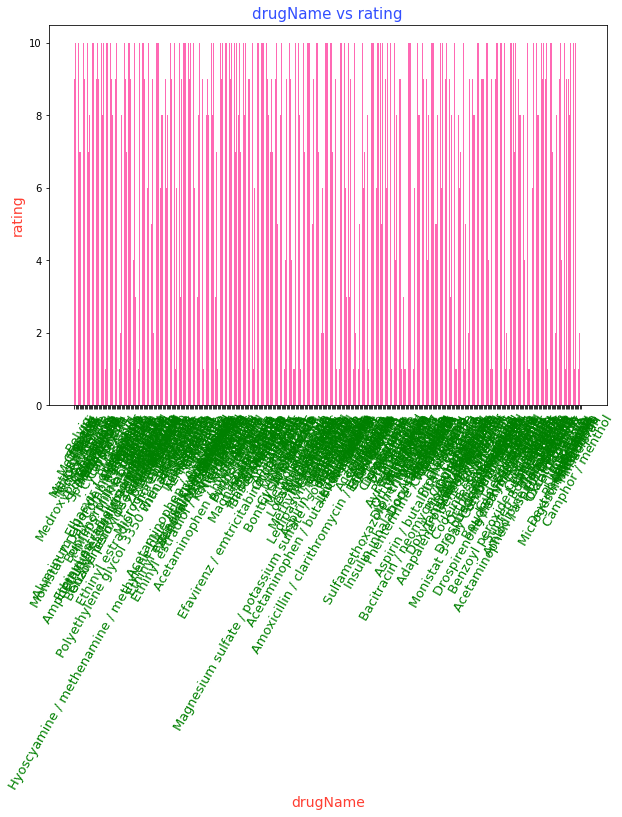

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(df_data['drugName'],df_data['rating'],color='hotpink',width=0.6)
plt.xlabel('drugName',size=14,color='#FF3F33')
plt.ylabel('rating',size=14,color='#FF3F33')
plt.xticks(rotation=60,size=13,color='green')
plt.title('drugName vs rating',size=15,color='#334FFF')
plt.show()

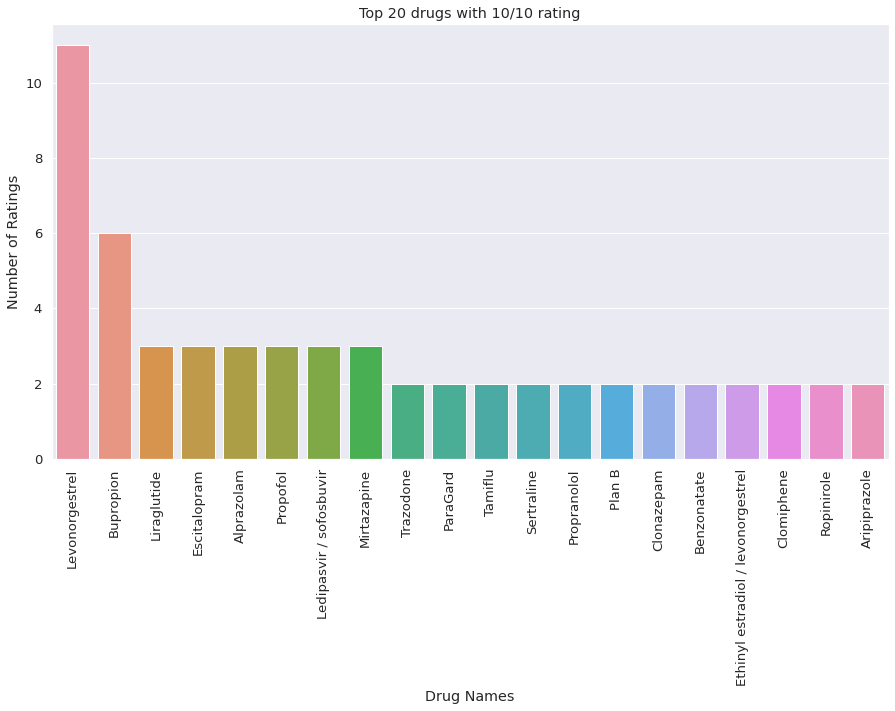

In [ ]:
# barplot of top 20 drugs with the 10/10 rating

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugName"].value_counts())
drugName = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugName[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

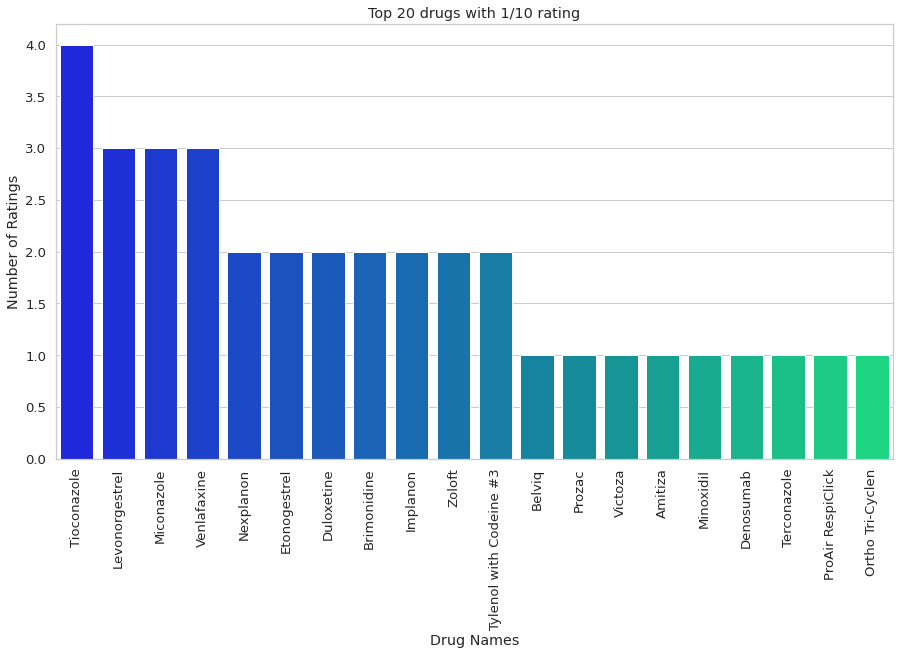

In [ ]:
# barplot OF Top 20 drugs with the 1/10 rating


sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 1, "drugName"].value_counts())
drugName = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugName[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set(title = 'Top 20 drugs with 1/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

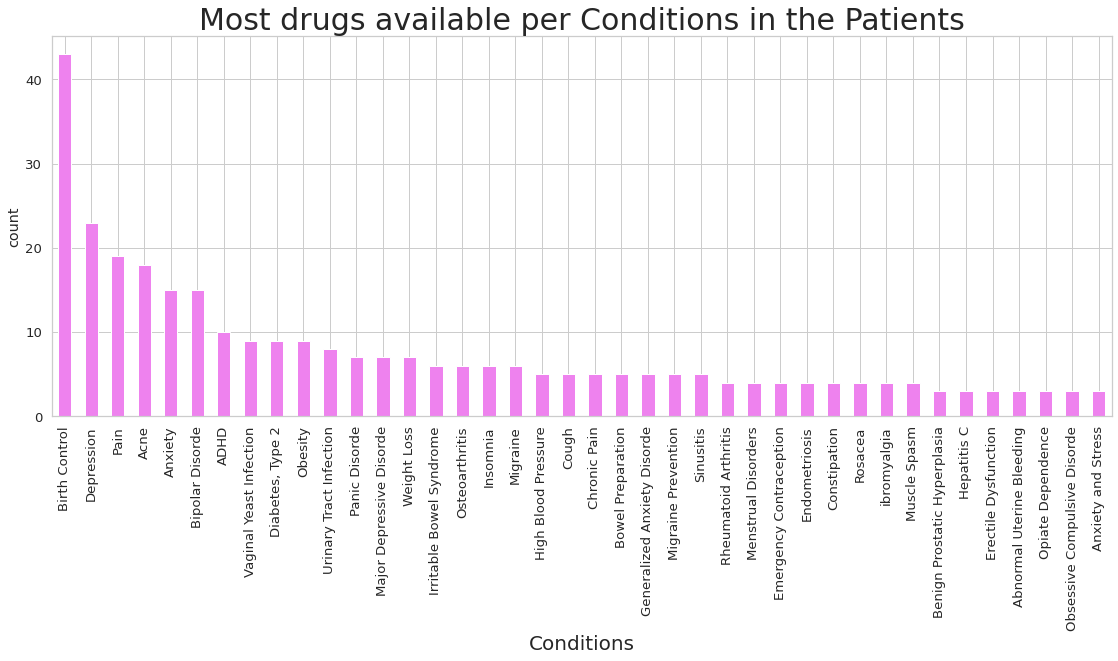

In [ ]:
## checking the most popular drugs per conditions
df_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'violet')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

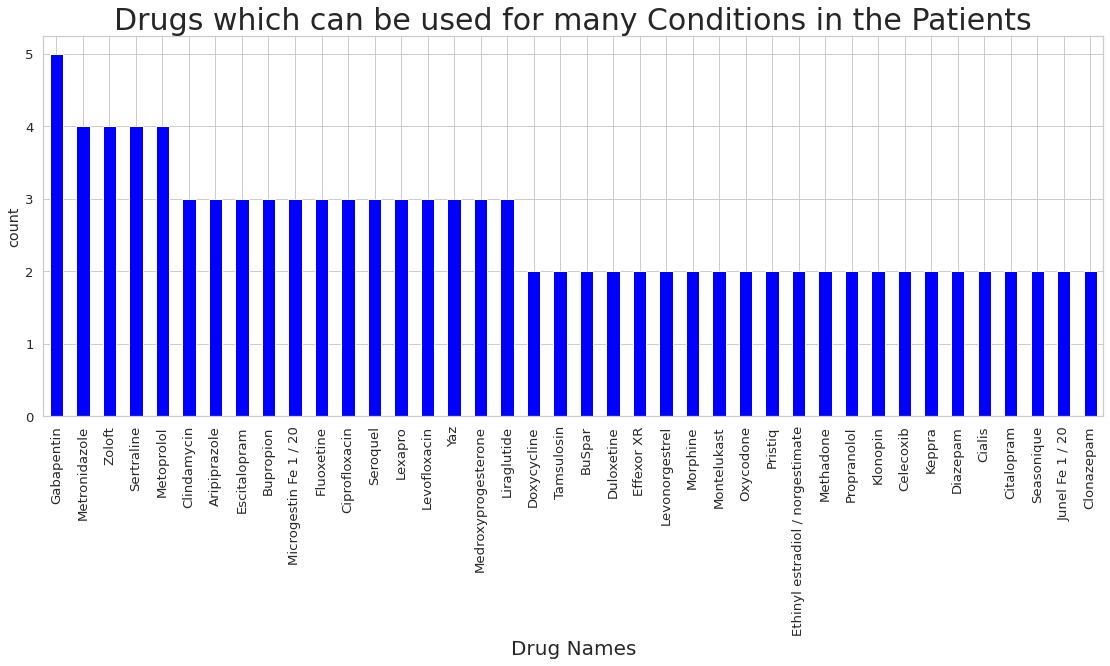

In [ ]:
df_data.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'blue')
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()

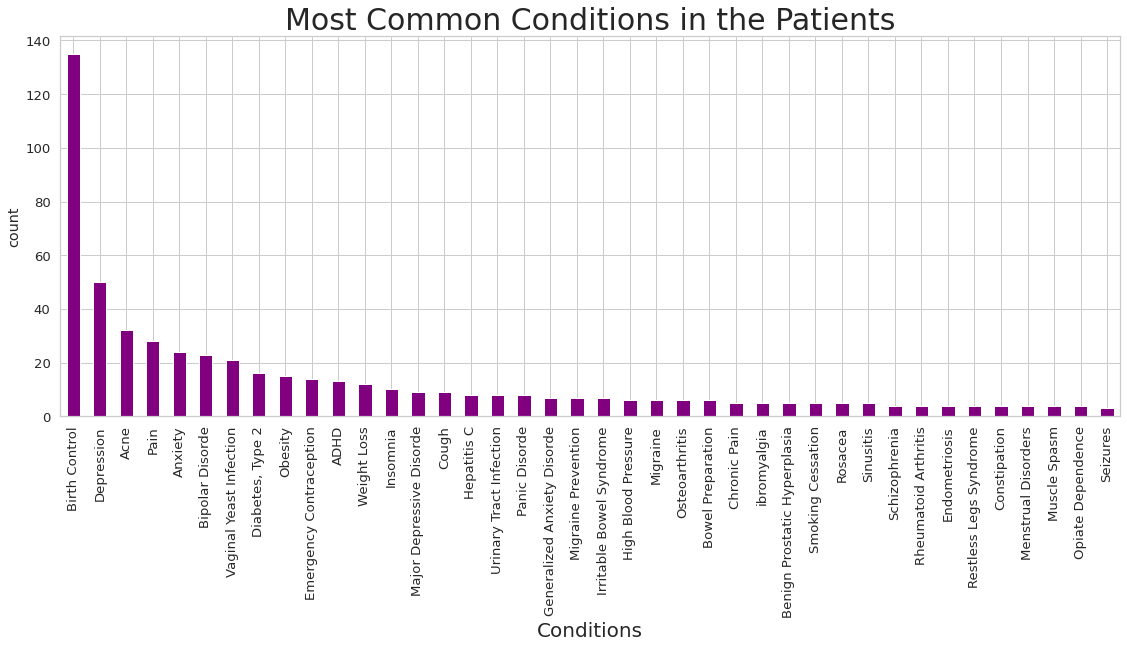

In [ ]:
df_data['condition'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

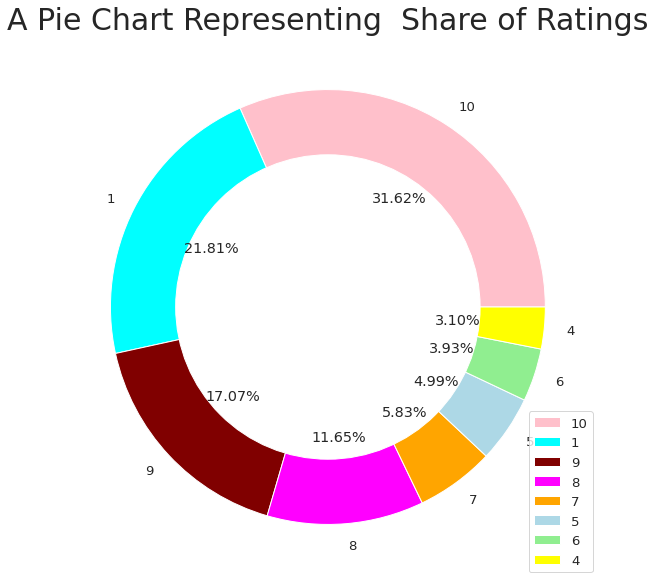

In [ ]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing  Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
# convert date to datetime & creating year and month features

df_data['date'] = pd.to_datetime(df_data['date'])
df_data['year'] = df_data['date'].dt.year  
df_data['month'] = df_data['date'].dt.month 

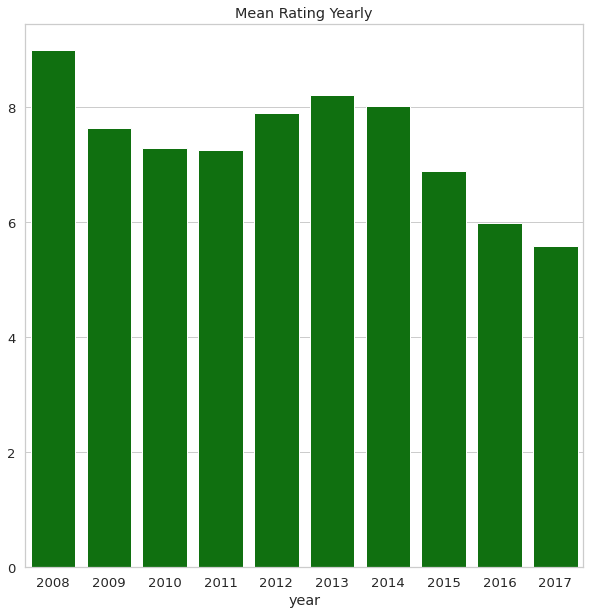

In [ ]:
#check average rating per year
yearly_mean_rating = df_data.groupby('year')['rating'].mean()
sns.barplot(yearly_mean_rating.index,yearly_mean_rating.values,color='green')
plt.title('Mean Rating Yearly')
plt.show()

In [ ]:
ratings_ = df_data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/df_data.shape[0])
print(ratings_)

   rating  counts    percent
0      10     228  30.604027
1       9     124  16.644295
2       1     106  14.228188
3       8      88  11.812081
4       3      38   5.100671
5       2      36   4.832215
6       7      35   4.697987
7       6      33   4.429530
8       5      32   4.295302
9       4      25   3.355705


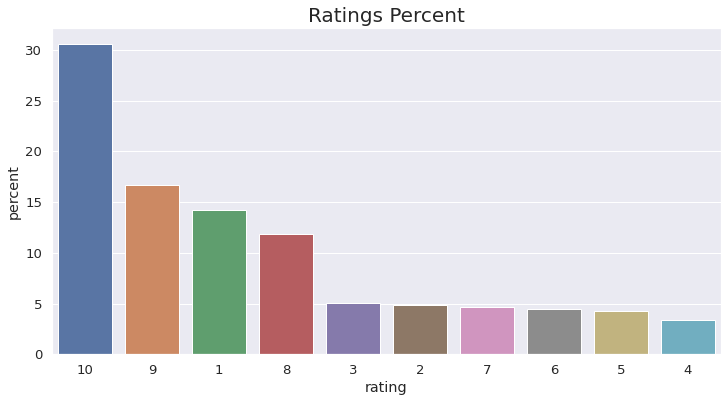

In [ ]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Ratings Percent',fontsize=20)
plt.show()

In [ ]:
df_data.drop(['review'],axis=1,inplace=True)
df_data.drop(['uniqueID'],axis=1,inplace=True)

In [ ]:
df_data.head(10)

,drugName,condition,rating,date,usefulCount,year,month
0,Medroxyprogesterone,Endometriosis,9,2009-08-27,51,2009,8
1,Medroxyprogesterone,Birth Control,8,2011-05-01,1,2011,5
2,Metronidazole,Rosacea,9,2012-02-29,110,2012,2
3,Metformin,Polycystic Ovary Syndrome,10,2015-06-24,24,2015,6
4,Nitrofurantoin,Urinary Tract Infection,10,2017-01-23,6,2017,1
5,Nitrofurantoin,Bladder Infection,9,2016-01-06,7,2016,1
6,Belviq,Weight Loss,7,2016-03-30,25,2016,3
7,Belviq,Weight Loss,1,2014-09-23,57,2014,9
8,Cryselle,Endometriosis,7,2014-02-02,14,2014,2
9,Sovaldi,Hepatitis C,1,2016-08-10,4,2016,8


# **Converting categorical data into values**

In [ ]:
from sklearn.preprocessing import label_binarize,LabelEncoder
cat_data=df_data.select_dtypes(exclude=np.number)

In [ ]:
cat_data.columns

Index(['drugName', 'condition', 'date'], dtype='object')

In [ ]:
lb=LabelEncoder()
lb.fit_transform(np.array(df_data['drugName']))
lb.fit_transform(np.array(df_data['condition']))

array([ 64,  32, 144, 135, 164,  33, 170, 170,  64,  76,  76,  13, 129,
       151,   9,  83, 166,  15, 132, 150,  32,  32,  32,   9,   9,   9,
         9,  79, 120, 142, 142, 107,  72,  71,  76,  93,   7,   7,  56,
        29, 121,  32,  32,  32,  32,  32,  32, 101,  45, 147,  32,  32,
        69, 164, 164,   9,  50, 168,  42, 122,  31,   9,   9,   9,  34,
       143, 124, 143,  32,  32, 128,  63,  55, 130, 102, 144,  15,  69,
        54,  54, 103, 103, 103,  15,  31,  15, 166, 166, 166, 166, 166,
       166,  57,  78,  78,  56,  32,   8,  32,   9,  32,   1,  32, 101,
       125, 104, 143,   9, 134,  38, 150, 157, 119, 121,  82,  35, 130,
        30,   7,   7,   7,  32, 170,  92,  91,  32, 117, 170, 117, 117,
       117, 107, 165,  42, 143,   7,  32,  32,  32,  32,  99,  54,  99,
        54, 132,  41,   9, 164,  32,  32,  32,  32,  31,  81, 130, 130,
        40,  38,   9,   9, 170, 170, 130,  32, 130,  49,  48, 117,  21,
       138, 167, 171,  46, 130, 130, 130, 130, 130,  32,  32, 14

In [ ]:
for i in cat_data.columns:
    df_data[i]=lb.fit_transform(np.array(df_data[i]))

In [ ]:
df_data

,drugName,condition,rating,date,usefulCount,year,month
0,216,64,9,42,51,2009,8
1,216,32,8,116,1,2011,5
2,227,144,9,165,110,2012,2
3,220,135,10,333,24,2015,6
4,262,164,10,541,6,2017,1
...,...,...,...,...,...,...,...
740,231,173,2,45,29,2009,9
741,364,90,1,505,15,2016,10
742,364,90,10,440,43,2016,4
743,364,54,10,461,63,2016,6


# **Splitting data**

In [ ]:
from sklearn.model_selection import train_test_split
X=df_data.drop(["rating"],axis=1)
y=df_data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(521, 6)
(224, 6)
(521,)
(224,)


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logreg_prediction = logreg.predict(X_test)


In [ ]:
from sklearn.metrics import  accuracy_score,classification_report

print(accuracy_score(logreg_prediction,y_test))
print(classification_report(logreg_prediction,y_test))

0.33221476510067116
              precision    recall  f1-score   support

           1       0.26      0.31      0.29        35
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         0
          10       0.90      0.34      0.49       259

    accuracy                           0.33       298
   macro avg       0.12      0.07      0.08       298
weighted avg       0.81      0.33      0.46       298



In [ ]:
print('Logistic Regression accuracy = ', metrics.accuracy_score(logreg_prediction,y_test))

Logistic Regression accuracy =  0.33221476510067116


# **Support Vector Machine**

In [ ]:
from sklearn import svm
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
svm_prediction = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(svm_prediction,y_test))
print(classification_report(svm_prediction,y_test))

0.3288590604026846
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       1.00      0.33      0.49       298

    accuracy                           0.33       298
   macro avg       0.10      0.03      0.05       298
weighted avg       1.00      0.33      0.49       298



In [ ]:
print('SVM accuracy = ', metrics.accuracy_score(svm_prediction,y_test))

SVM accuracy =  0.3288590604026846


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_prediction = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(dt_prediction,y_test))
print(classification_report(dt_prediction,y_test))

0.18456375838926176
              precision    recall  f1-score   support

           1       0.19      0.20      0.19        41
           2       0.08      0.06      0.07        16
           3       0.00      0.00      0.00        11
           4       0.14      0.14      0.14         7
           5       0.08      0.04      0.06        23
           6       0.23      0.18      0.20        17
           7       0.07      0.08      0.07        13
           8       0.06      0.05      0.06        38
           9       0.16      0.17      0.16        47
          10       0.31      0.35      0.33        85

    accuracy                           0.18       298
   macro avg       0.13      0.13      0.13       298
weighted avg       0.18      0.18      0.18       298



In [ ]:
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.18456375838926176


# **K-Nearest Neighbour(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_prediction = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(knn_prediction,y_test))
print(classification_report(knn_prediction,y_test))

0.23154362416107382
              precision    recall  f1-score   support

           1       0.40      0.22      0.28        79
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         2
           8       0.12      0.11      0.12        35
           9       0.26      0.27      0.27        48
          10       0.36      0.43      0.39        81

    accuracy                           0.23       298
   macro avg       0.11      0.10      0.11       298
weighted avg       0.26      0.23      0.24       298



In [ ]:
print('KNN accuracy = ',metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.23154362416107382


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, criterion = 'entropy',random_state = 0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
rf_prediction = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(rf_prediction,y_test))
print(classification_report(rf_prediction,y_test))

0.21476510067114093
              precision    recall  f1-score   support

           1       0.21      0.18      0.20        49
           2       0.08      0.08      0.08        12
           3       0.07      0.07      0.07        14
           4       0.14      0.14      0.14         7
           5       0.08      0.05      0.06        21
           6       0.08      0.10      0.09        10
           7       0.00      0.00      0.00         8
           8       0.12      0.12      0.12        34
           9       0.10      0.15      0.12        34
          10       0.42      0.38      0.40       109

    accuracy                           0.21       298
   macro avg       0.13      0.13      0.13       298
weighted avg       0.23      0.21      0.22       298



In [ ]:
print('random forest accuracy =',metrics.accuracy_score(rf_prediction,y_test))

random forest accuracy = 0.21476510067114093


# Conclusion:
#The Logistic Regression algorithm gives us the maximum Accuracy(33%) compared to other 4 Machine Learning classification Algorithms.

In [ ]:
import pickle 
pickle.dump(logreg_prediction,open('model.pkl','wb'))